# Evaluation:
## Accuracy Curve and Loss Curve

In [1]:
#Loading History Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn-white')

df = pd.read_csv('History_Data.csv')
df.columns = ['epochs'] + df.columns[1:].tolist()
df['epochs'] = df['epochs'] + 1

df.head(5)

,epochs,Unnamed: 0.1,loss,acc,val_loss,val_acc,lr
0,1,0,1.362841,0.326087,1.344207,0.346154,0.001
1,2,1,1.354143,0.335404,1.300498,0.346154,0.001
2,3,2,1.297900,0.309006,1.272186,0.346154,0.001
3,4,3,1.237293,0.413043,1.188661,0.378205,0.001
4,5,4,1.159002,0.447205,1.076584,0.474359,0.001


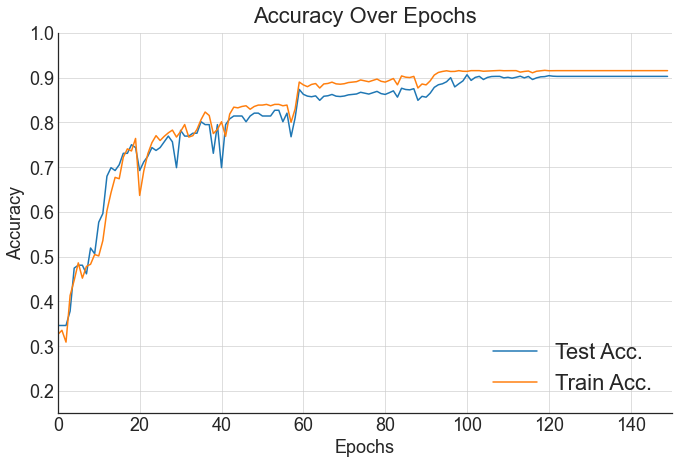

In [2]:
#Accuracy Curve
plt.figure(figsize=(11,7))

plt.plot(df['val_acc'],label='Test Acc.')
plt.plot(df['acc'],label='Train Acc.')

plt.legend(loc=4,fontsize=22)
plt.grid(alpha=0.8)

spines = plt.gca().spines

spines['top'].set_visible(False)
spines['right'].set_visible(False)

plt.ylim(0.15,1.0);
plt.xlim(0,150);
plt.title('Accuracy Over Epochs',fontsize=22,pad=10)
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.tick_params(axis='both', labelsize=18)

plt.savefig('Visualizations/Accuracy Curve.png',bbox_inches='tight')

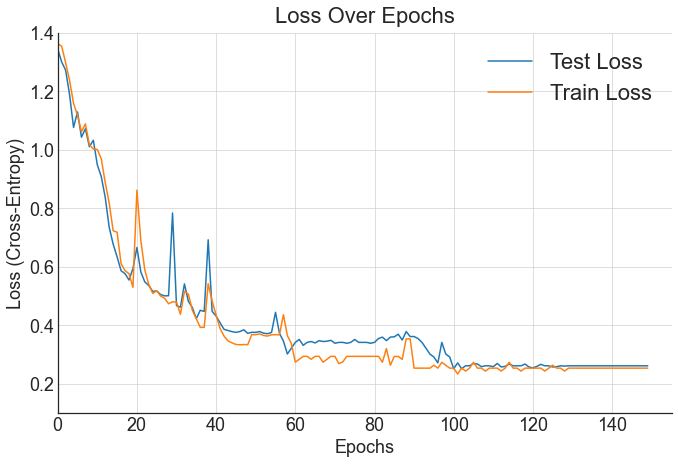

In [3]:
#Loss Curve
plt.figure(figsize=(11,7))

plt.plot(df['val_loss'],label='Test Loss')
plt.plot(df['loss'],label='Train Loss')

plt.legend(loc=1,fontsize=22)
plt.grid(alpha=0.8)

spines = plt.gca().spines

spines['top'].set_visible(False)
spines['right'].set_visible(False)

plt.ylim(0.1,1.4);
plt.xlim(0,155);
plt.title('Loss Over Epochs',fontsize=22,pad=10)
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Loss (Cross-Entropy)',fontsize=18)
plt.tick_params(axis='both', labelsize=18)

plt.savefig('Visualizations/Loss Curve.png',bbox_inches='tight')

## Confusion Matrix - Test Set

In [4]:
#Prepairing test data flow
from keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory('dataset/test_Set', 
                                                  target_size = (240, 320), 
                                                  batch_size = 32, 
                                                  class_mode = 'categorical',
                                                  shuffle=False)
#Class Encoding
class_code = test_generator.class_indices
#y_True
y_true = test_generator.classes

#Getting Predictions
predictions = model.predict(test_generator)

#Getting Predictions labels
import numpy as np
y_pred = np.argmax(predictions, axis=1)

#confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true, y_pred)
conf_matrix

array([[51,  3,  0,  0,  0],
       [ 3, 39,  0,  0,  0],
       [ 0,  0, 34,  2,  0],
       [ 0,  0,  5, 19,  0],
       [ 0,  4,  0,  0, 20]])

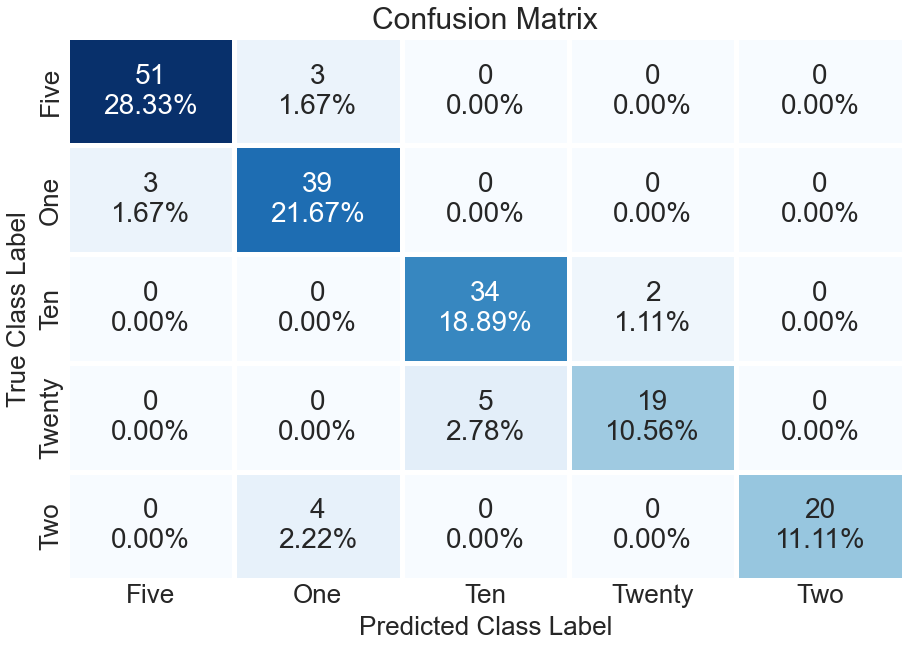

In [5]:
#Setting Class Labels
Class_labels = ['One','Two','Five','Ten','Twenty']
Class_labels.sort()

#Plotting Confusion Matrix
from Confusion_Matrix import make_confusion_matrix
make_confusion_matrix(cf = conf_matrix, 
                      categories=Class_labels,
                      figsize=(15,10),
                      cbar=False,
                      linewidths=5,
                      annot_kws={'size':28});

plt.title('Confusion Matrix',fontsize=30, pad=8)
plt.gca().tick_params(axis ='both', labelsize=26)
plt.ylabel('True Class Label', fontsize=26,labelpad=8)
plt.xlabel('Predicted Class Label', fontsize=26,labelpad=8);

plt.savefig('Visualizations/Confusion Matrix.png',bbox_inches='tight')

## Loading Model and Test Images

In [6]:
#Loading the model
from tensorflow.keras.models import load_model
model = load_model('Saved_Model')

#Taking Some Test Images
test = {'Images' : [],
        'Input' : []}
from PIL import Image
import os
dir_path = 'Test Images/'

for file in os.listdir(dir_path):
  #Load Image
  im = Image.open(dir_path + file)

  #Resize Image
  im = im.crop((1000,700,3000,2300))
  im = im.resize((400,300))

  #Store Sized Image File
  test['Images'].append(im)

  #Rescale and Store normalized array
  im = Image.open(dir_path + file)
  im = im.resize((320,240))
  im = np.asarray(im)
  im = im/255
  im = np.expand_dims(im,axis=0)
  test['Input'].append(im)

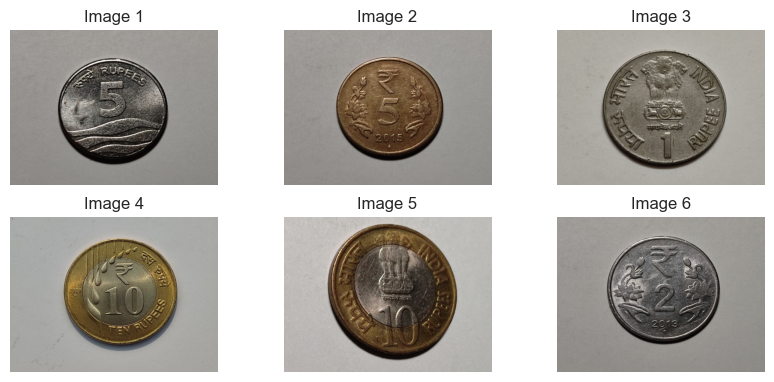

In [7]:
# Plotting Images
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7),dpi=100)
rows, columns = 3,3

for i in range(len(test['Images'])):
  fig.add_subplot(rows, columns, i+1)
  plt.axis('off')
  plt.title('Image '+str(i + 1))
  plt.imshow(test['Images'][i])

## Predicting Class for the Test Images

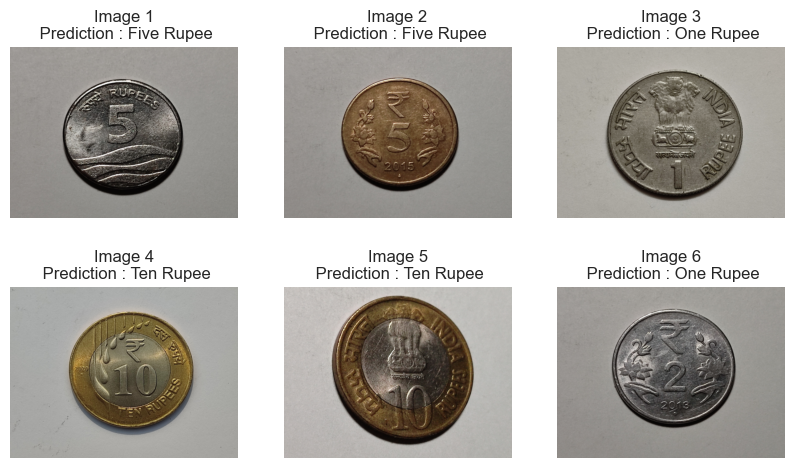

In [8]:
#Getting Prediction
prediction_labels = []
for inp_img in test['Input']:
  pred_prob = model.predict(inp_img)
  prediction = Class_labels[np.argmax(pred_prob)]
  prediction_labels.append(prediction)

#Plotting Results
fig = plt.figure(figsize=(10,9),dpi=100)
rows, columns = 3,3

for i,pred in zip(range(6),prediction_labels):
  fig.add_subplot(rows, columns, i+1)
  plt.axis('off')
  plt.title('Image '+str(i + 1)+'\n Prediction : {} Rupee'.format(pred))
  plt.imshow(test['Images'][i])
 
plt.savefig('Visualizations/Prediction.png',bbox_inches='tight')